In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [101]:
K = np.array([0.017, 0.052]) # m / Lpm^2, valve open, valve half-closed
Pv = 26.5e3 # Pa
rho = 1e3 # kg/m^2
g = 9.807 # m/s^2

def hp(Q): # m
    return 15 - 0.031*Q**2

def hsys(Q, i): # m
    return 1.8+K[i]*Q**2

def NPSH(Q): # m
    return 13 - 0.021*Q**2 - Pv/rho/g

def NPSHreq(Q): # m
    return 0.034*Q**2

In [108]:
# find operating point and plot
def NPSH_plot(i):

    Q_OP = fsolve(lambda q: hp(q) - hsys(q, i), 16)
    h_OP = hp(Q_OP)

    # find cavitation point
    Q_CP = fsolve(lambda q: NPSH(q) - NPSHreq(q), 14)
    h_CP = NPSH(Q_CP)
    
    print('(Q_OP, h_OP) = (%f, %f)'%(Q_OP, h_OP) )
    print('(Q_CP, h_CP) = (%f, %f)'%(Q_CP, h_CP) )

    Q = np.linspace(0, 20)

    plt.figure(dpi=120)
    # pump and system demand curves
    plt.plot(Q, hp(Q), 'b-', label='$h_{pump}$')
    plt.plot(Q, hsys(Q, i), 'b--', label='$h_{sys}$')
    plt.plot(Q_OP, h_OP, 'ko', label='Operating Point' )
    plt.plot([Q_OP, Q_OP], [0, h_OP], 'k:', label='' )

    # NPSH and required NPSH curves
    plt.plot(Q, NPSH(Q), 'g-', label = 'NPSH')
    plt.plot(Q, NPSHreq(Q), 'g-.', label ='NPSH$_{req}$')
    plt.plot(Q_CP, h_CP, 'ko', label='Cavitation Point', \
             markerfacecolor='none' )
    plt.plot([Q_CP, Q_CP], [0, h_CP], 'k:', label='' )

    plt.xlim([0, 20])
    plt.ylim([0, 20])
    plt.ylabel('h (m)')
    plt.xlabel('Q (L/min)')
    plt.legend(loc='upper right', ncol=2)

    plt.tight_layout()
    plt.show()

## Operating and Cavitation Point - Valve Fully Open

(Q_OP, h_OP) = (16.583124, 6.475000)
(Q_CP, h_CP) = (13.683333, 6.365943)


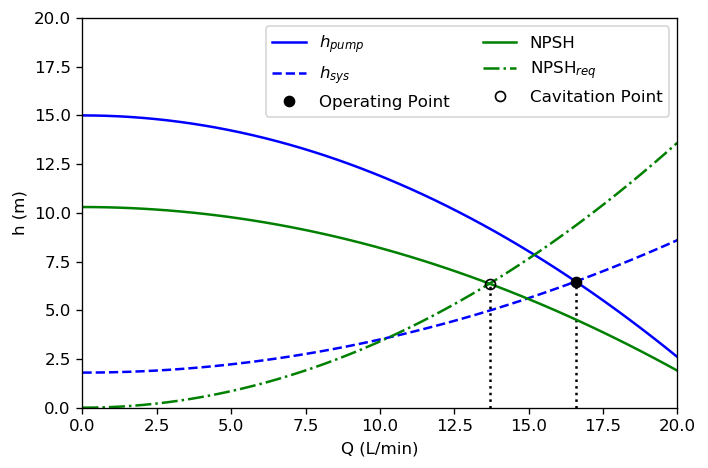

In [109]:
NPSH_plot(0)

## Operating and Cavitation Point - Valve Half Closed

(Q_OP, h_OP) = (12.610953, 10.069880)
(Q_CP, h_CP) = (13.683333, 6.365943)


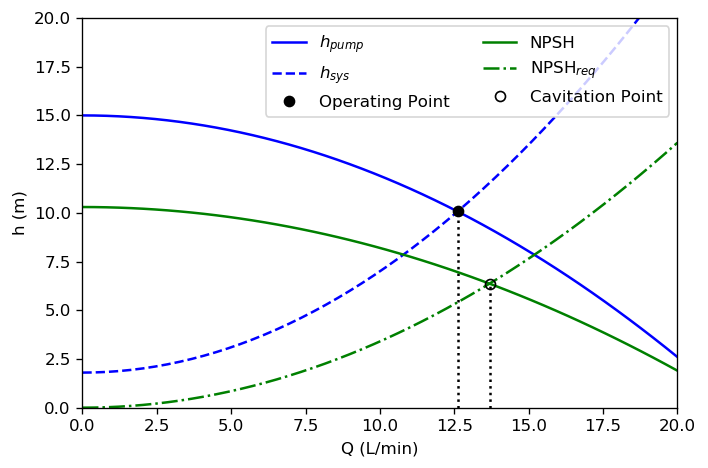

In [110]:
NPSH_plot(1)